In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from code.fasttext.embedding_utils import TableEncoder, compare_embeddings_of, compare_embeddings, show_most_similar_rows

In [26]:
data = {
    'presidents': '/home/giovanni/unimore/TESI/src/data/us_presidents/List_of_presidents_of_the_United_States_1.csv',
    'parks': '/home/giovanni/unimore/TESI/src/data/us_national_parks/List_of_national_parks_of_the_United_States_1.csv',
    'forests': '/home/giovanni/unimore/TESI/src/data/us_national_forests/List_of_national_forests_of_the_United_States_1.csv'
}

In [3]:
presidents_df = pd.read_csv(data['presidents'])
parks_df = pd.read_csv(data['parks'])
forests_df = pd.read_csv(data['forests'])

In [4]:
presidents_df.shape, parks_df.shape, forests_df.shape

((46, 8), (63, 7), (134, 6))

In [5]:
presidents_df.head()

,No.,Portrait,Name\n(Birth–Death),Term,Party,Party.1,Election,Vice President
0,1,NaN,George Washington\n(1732–1799),"April 30, 1789\n–\nMarch 4, 1797",NaN,Unaffiliated,1788–1789\n\n1792,John Adams
1,2,NaN,John Adams\n(1735–1826),"March 4, 1797\n–\nMarch 4, 1801",NaN,Federalist,1796,Thomas Jefferson
2,3,NaN,Thomas Jefferson\n(1743–1826),"March 4, 1801\n–\nMarch 4, 1809",NaN,Democratic-\nRepublican,1800\n\n\n1804,Aaron Burr\n\nGeorge Clinton
3,4,NaN,James Madison\n(1751–1836),"March 4, 1809\n–\nMarch 4, 1817",NaN,Democratic-\nRepublican,1808\n\n1812,"George Clinton\n\nVacant after\nApril 20, 1812..."
4,5,NaN,James Monroe\n(1758–1831),"March 4, 1817\n–\nMarch 4, 1825",NaN,Democratic-\nRepublican,1816\n\n1820,Daniel D. Tompkins


In [6]:
presidents_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   No.                 46 non-null     int64  
 1   Portrait            0 non-null      float64
 2   Name
(Birth–Death)  46 non-null     object 
 3   Term                46 non-null     object 
 4   Party               0 non-null      float64
 5   Party.1             46 non-null     object 
 6   Election            46 non-null     object 
 7   Vice President      46 non-null     object 
dtypes: float64(2), int64(1), object(5)
memory usage: 3.0+ KB


In [27]:
forests_df.head()

,NameA,LocationB,Date formedC,Area,DescriptionD
0,Allegheny,Pennsylvania\n41°39′N 79°01′W﻿ / ﻿41.650°N 79....,"September 24, 1923","513,655 acres (2,078.7 km2)",Pennsylvania's only national forest includes K...
1,Angeles,California\n34°24′N 118°10′W﻿ / ﻿34.400°N 118....,"December 20, 1892","661,565 acres (2,677.3 km2)",Located in the San Gabriel Mountains at the ed...
2,Angelina,Texas\n31°13′N 94°17′W﻿ / ﻿31.217°N 94.283°W﻿ ...,"October 13, 1936","154,140 acres (623.8 km2)","Primarily longleaf, loblolly, and shortleaf pi..."
3,Apache–Sitgreaves,"Arizona, New Mexico\n33°44′N 109°05′W﻿ / ﻿33.7...","August 17, 1898","2,626,306 acres (10,628.3 km2)",Encompassing the Mogollon Rim and White Mounta...
4,Apalachicola,Florida\n30°11′N 84°41′W﻿ / ﻿30.183°N 84.683°W...,"May 13, 1936","576,119 acres (2,331.5 km2)","As the largest national forest in Florida, Apa..."


In [28]:
parks_df.head()

,Name,Location,Date established as park,Area (2023),Recreation visitors (2022),Description
0,Acadia,Maine\n44°21′N 68°13′W﻿ / ﻿44.35°N 68.21°W﻿ / ...,"February 26, 1919","49,071.40 acres (198.6 km2)","3,970,260",Covering most of Mount Desert Island and other...
1,American Samoa,American Samoa\n14°15′S 170°41′W﻿ / ﻿14.25°S 1...,"October 31, 1988","8,256.67 acres (33.4 km2)","12,135",The southernmost national park is on three Sam...
2,Arches,Utah\n38°41′N 109°34′W﻿ / ﻿38.68°N 109.57°W﻿ /...,"November 12, 1971","76,678.98 acres (310.3 km2)","1,460,652","This site features more than 2,000 natural san..."
3,Badlands,South Dakota\n43°45′N 102°30′W﻿ / ﻿43.75°N 102...,"November 10, 1978","242,755.94 acres (982.4 km2)","1,006,809","The Badlands are a collection of buttes, pinna..."
4,Big Bend †,Texas\n29°15′N 103°15′W﻿ / ﻿29.25°N 103.25°W﻿ ...,"June 12, 1944","801,163.21 acres (3,242.2 km2)","514,107",Named for the prominent bend in the Rio Grande...


In [7]:
presidents_df.dropna(axis='columns', how='all', inplace=True)
parks_df.dropna(axis='columns', how='all', inplace=True)
forests_df.dropna(axis='columns', how='all', inplace=True)

In [8]:
tabenc = TableEncoder()

## Comparing Columns

### Presidents VS Parks

In [9]:
def round_to(n, precision):
    if n >= 0 or n < 0:
        correction = 0.5 if n >= 0 else -0.5
        return int(n / precision + correction) * precision
    else:
        return n

def round_to_05(n):
    return float(format(round_to(n, 0.05), ".2f"))

In [10]:
mc_presidents_vs_parks = compare_embeddings(
    presidents_df, parks_df, tabenc, 
    'columns', True,
    [False, True], [False, True], True 
)

In [11]:
mc_presidents_vs_parks.head()

,C1,C2,cosine similarity,cosine similarity-nonum,delta#1,cosine similarity-wlabel,delta#2,cosine similarity-wlabel-nonum,delta#3
0,Term,Date established as park,0.974933,0.575578,0.399,0.974743,0.000,0.585763,0.389
1,No.,Area (2023),0.964039,<NA>,nan,0.963748,0.000,<NA>,nan
2,No.,Date established as park,0.941638,<NA>,nan,0.941106,0.001,<NA>,nan
3,No.,Location,0.938009,<NA>,nan,0.937946,0.000,<NA>,nan
4,No.,Recreation visitors (2022),0.929957,<NA>,nan,0.929787,0.000,<NA>,nan


### Forests VS Parks

In [12]:
mc_forests_vs_parks = compare_embeddings(
    forests_df, parks_df, tabenc, 
    'columns', True,
    [False, True], [False, True], True 
)

In [13]:
mc_forests_vs_parks.head()

,C1,C2,cosine similarity,cosine similarity-nonum,delta#1,cosine similarity-wlabel,delta#2,cosine similarity-wlabel-nonum,delta#3
0,LocationB,Location,0.992456,0.999616,-0.007,0.992454,0.000,0.999581,-0.007
1,Date formedC,Date established as park,0.987329,0.94104,0.046,0.987331,-0.000,0.94236,0.045
2,Area,Area (2023),0.97534,1.0,-0.025,0.975335,0.000,0.999995,-0.025
3,Area,Recreation visitors (2022),0.96815,<NA>,nan,0.968071,0.000,0.11542,0.853
4,LocationB,Area (2023),0.929298,0.342115,0.587,0.929178,0.000,0.341907,0.587


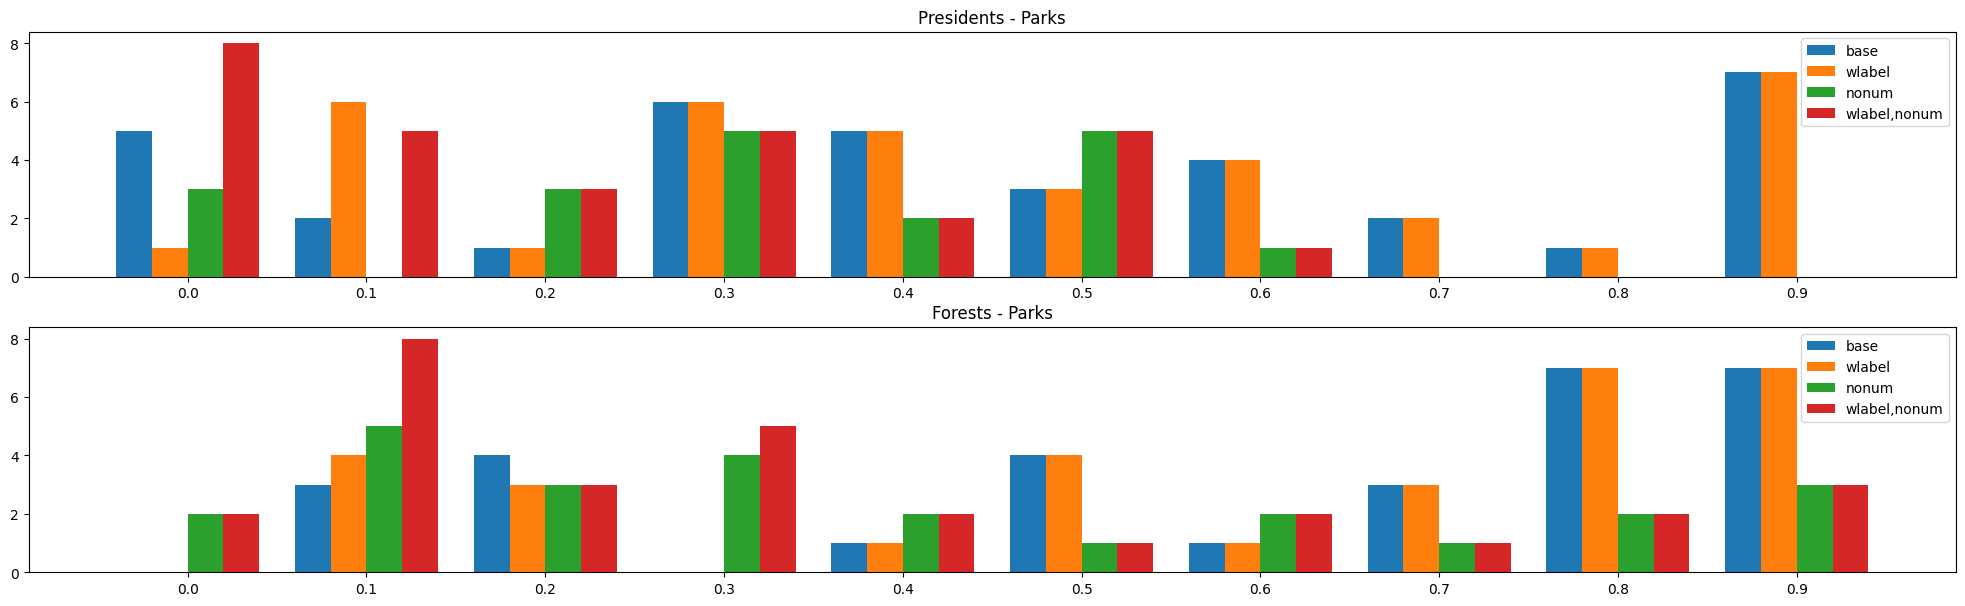

In [14]:
fig, axis = plt.subplots(2, 1, figsize=(20, 6))
fig.tight_layout(h_pad=1.50)
bins = np.arange(0, 1.1, 0.1)

for title, data, ax in zip(('Presidents - Parks', 'Forests - Parks'), (mc_presidents_vs_parks, mc_forests_vs_parks), axis):
    ax.set_xticks(bins)
    ax.hist(
        [
            data['cosine similarity'],
            data['cosine similarity-wlabel'],
            data['cosine similarity-nonum'],
            data['cosine similarity-wlabel-nonum']
        ],
        bins=bins,
        label=['base', 'wlabel', 'nonum', 'wlabel,nonum'],
        align='left',
        #weights=[   # y-axis in [0-1]
        #    np.ones_like(data['cosine similarity']) / data['cosine similarity'].shape[0],
        #    np.ones_like(data['cosine similarity_wlabel']) / data['cosine similarity_wlabel'].shape[0],
        #    np.ones_like(data['cosine similarity_nonum']) / data['cosine similarity_nonum'].shape[0]
        #]
    )
    ax.set_title(title)
    ax.legend()
plt.show()

## Comparing Rows

### Presidents VS Parks

In [15]:
mr_presidents_vs_parks = compare_embeddings(
    presidents_df, parks_df, tabenc, 
    'rows', True,
    [False, True], [False, True], True 
)

In [16]:
mr_presidents_vs_parks.head()

,R1,R2,cosine similarity,cosine similarity-nonum,delta#1,cosine similarity-wlabel,delta#2,cosine similarity-wlabel-nonum,delta#3
0,37,42,0.957372,0.190845,0.767,0.901886,0.055,0.441528,0.516
1,37,6,0.95453,0.22214,0.732,0.894855,0.060,0.464683,0.490
2,12,38,0.953945,0.205378,0.749,0.910354,0.044,0.433734,0.520
3,12,62,0.953856,0.218387,0.735,0.894193,0.060,0.42749,0.526
4,37,35,0.953803,0.141237,0.813,0.92201,0.032,0.42653,0.527


In [18]:
show_most_similar_rows(mr_presidents_vs_parks[['R1', 'R2', 'cosine similarity']], presidents_df, parks_df, 1)

#0: 0.9573717326303061
	37: 38 Gerald Ford
(1913–2006) August 9, 1974
–
January 20, 1977 Republican – Vacant through
December 19, 1974

Nelson Rockefeller
	42: Mesa Verde * Colorado
37°11′N 108°29′W﻿ / ﻿37.18°N 108.49°W﻿ / 37.18; -108.49﻿ (Mesa Verde) June 29, 1906 52,485.17 acres (212.4 km2) 499,790 This area constitutes over 4,000 archaeological sites of the Ancestral Puebloan people, who lived here and elsewhere in the Four Corners region for at least 700 years. Cliff dwellings built in the 12th and 13th centuries include Cliff Palace, which has 150 rooms and 23 kivas, and the Balcony House, with its many passages and tunnels. (WHS)



In [19]:
show_most_similar_rows(mr_presidents_vs_parks[['R1', 'R2', 'cosine similarity-nonum']], presidents_df, parks_df, 1)

#0: 0.19084477803630834
	37: 38 Gerald Ford
(1913–2006) August 9, 1974
–
January 20, 1977 Republican – Vacant through
December 19, 1974

Nelson Rockefeller
	42: Mesa Verde * Colorado
37°11′N 108°29′W﻿ / ﻿37.18°N 108.49°W﻿ / 37.18; -108.49﻿ (Mesa Verde) June 29, 1906 52,485.17 acres (212.4 km2) 499,790 This area constitutes over 4,000 archaeological sites of the Ancestral Puebloan people, who lived here and elsewhere in the Four Corners region for at least 700 years. Cliff dwellings built in the 12th and 13th centuries include Cliff Palace, which has 150 rooms and 23 kivas, and the Balcony House, with its many passages and tunnels. (WHS)



### Forests VS Parks

In [20]:
mr_forests_vs_parks = compare_embeddings(
    forests_df, parks_df, tabenc,
    'rows', True,
    [False, True], [False, True], True
)

In [22]:
mr_forests_vs_parks.head()

,R1,R2,cosine similarity,cosine similarity-nonum,delta#1,cosine similarity-wlabel,delta#2,cosine similarity-wlabel-nonum,delta#3
0,76,0,0.986866,0.979629,0.007,0.954837,0.032,0.923106,0.064
1,115,38,0.986134,0.978908,0.007,0.960356,0.026,0.932063,0.054
2,56,45,0.985651,0.979258,0.006,0.955136,0.031,0.928634,0.057
3,60,33,0.985342,0.961992,0.023,0.957147,0.028,0.928733,0.057
4,122,0,0.984152,0.988227,-0.004,0.959514,0.025,0.937042,0.047


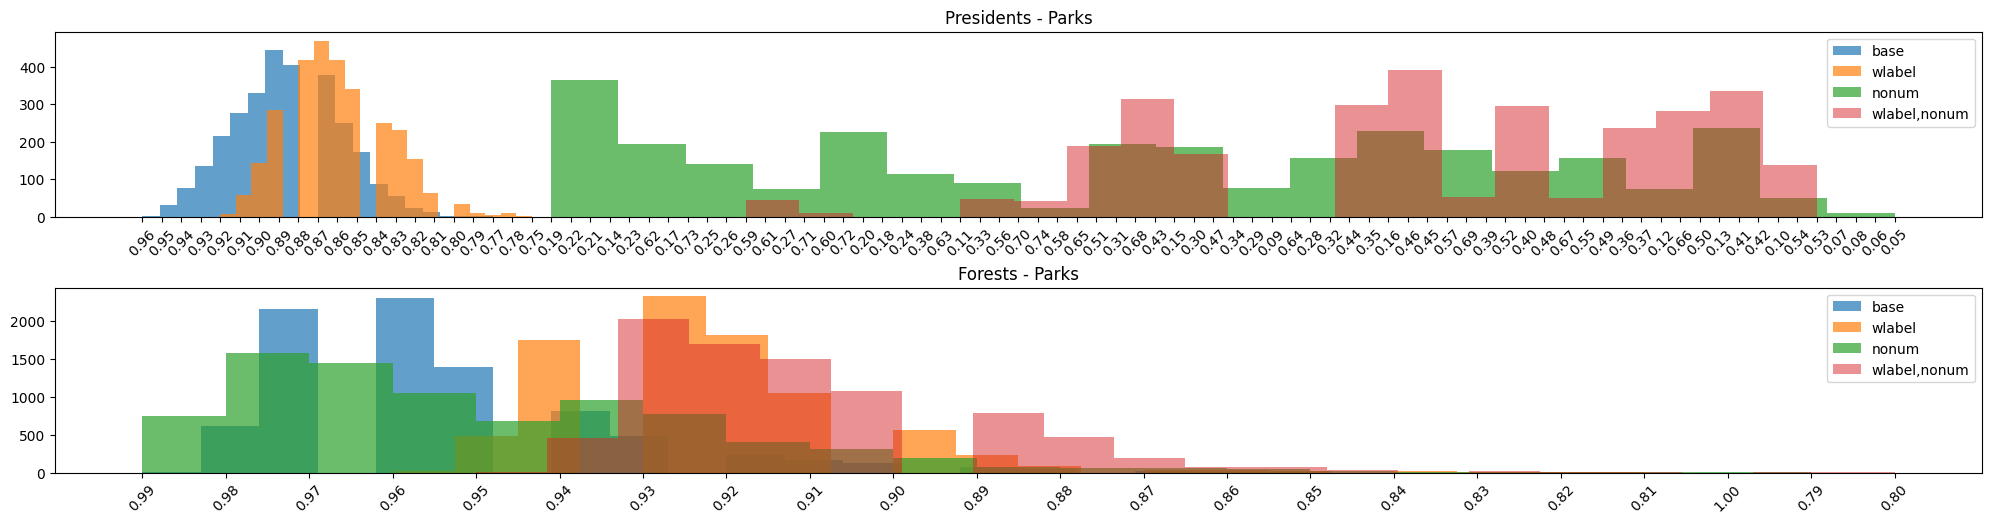

In [21]:
fig, axis = plt.subplots(2, 1, figsize=(20, 5))
fig.tight_layout(h_pad=3)

for title, data, ax in zip(('Presidents - Parks', 'Forests - Parks'), (mr_presidents_vs_parks, mr_forests_vs_parks), axis):   
    ax.hist(data['cosine similarity'].apply(lambda x: format(x, '.2f')).values, label='base', bins=20, alpha=.7)
    ax.hist(data['cosine similarity-wlabel'].apply(lambda x: format(x, '.2f')).values, label='wlabel', bins=20, alpha=.7)
    ax.hist(data['cosine similarity-nonum'].apply(lambda x: format(x, '.2f')).values, label='nonum', bins=20, alpha=.7)
    ax.hist(data['cosine similarity-wlabel-nonum'].apply(lambda x: format(x, '.2f')).values, label='wlabel,nonum', bins=20, alpha=.5)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    ax.set_title(title)
    ax.legend()
plt.show()

In [23]:
show_most_similar_rows(mr_forests_vs_parks[['R1', 'R2', 'cosine similarity']], forests_df, parks_df, 1)

#0: 0.986865534099765
	76: Monongahela West Virginia
38°33′N 79°54′W﻿ / ﻿38.550°N 79.900°W﻿ / 38.550; -79.900﻿ (Monongahela) April 28, 1920 920,583 acres (3,725.5 km2) Monongahela National Forest includes Spruce Knob–Seneca Rocks National Recreation Area and eight wilderness areas. Spruce Knob is the highest point in West Virginia at 4,863 ft (1,482 m), and Seneca Rocks is a 900 ft (270 m) quartzite crag.
	0: Acadia Maine
44°21′N 68°13′W﻿ / ﻿44.35°N 68.21°W﻿ / 44.35; -68.21﻿ (Acadia) February 26, 1919 49,071.40 acres (198.6 km2) 3,970,260 Covering most of Mount Desert Island and other coastal islands, Acadia features the tallest mountain on the Atlantic coast of the United States, granite peaks, ocean shoreline, woodlands, and lakes. There are freshwater, estuary, forest, and intertidal habitats.



In [24]:
show_most_similar_rows(mr_forests_vs_parks[['R1', 'R2', 'cosine similarity-nonum']], forests_df, parks_df, 1, False)

#0: 0.9952187605332061
	5: Arapaho Colorado
39°41′N 105°56′W﻿ / ﻿39.683°N 105.933°W﻿ / 39.683; -105.933﻿ (Arapaho) October 24, 1903 720,418 acres (2,915.4 km2) Arapaho National Forest is in the high Rockies and includes six wilderness areas. It is currently managed jointly with Roosevelt National Forest and Pawnee National Grassland. The highest paved road in North America ascends Mount Blue Sky at an elevation of 14,265 ft (4,348 m).
	51: Saguaro Arizona
32°15′N 110°30′W﻿ / ﻿32.25°N 110.50°W﻿ / 32.25; -110.50﻿ (Saguaro) October 14, 1994 92,876.75 acres (375.9 km2) 908,194 Split into the separate Rincon Mountain and Tucson Mountain districts, this park is evidence that the dry Sonoran Desert is still home to a great variety of life spanning six biotic communities. Beyond the namesake giant saguaro cacti, there are barrel cacti, chollas, and prickly pears, as well as lesser long-nosed bats, spotted owls, and javelinas.

